In [1]:
import pandas as pd

df = pd.read_csv("../results.csv")
print(df.head())

              Image                                            Caption  \
0  000000062692.jpg  A detailed picture showing the structure of an...   
1  000000021903.jpg  A detailed picture showing the large number of...   
2  000000001425.jpg  A detailed picture showing the inside and outs...   
3  000000060932.jpg  A detailed picture showing the church\n\n'\n\n...   
4  000000054593.jpg  A detailed picture showing a new, long-sib per...   

   Token Count  CLIP Score  
0           25     15.2091  
1           20     24.0172  
2           12     19.8648  
3           21     21.2518  
4           33     19.5859  


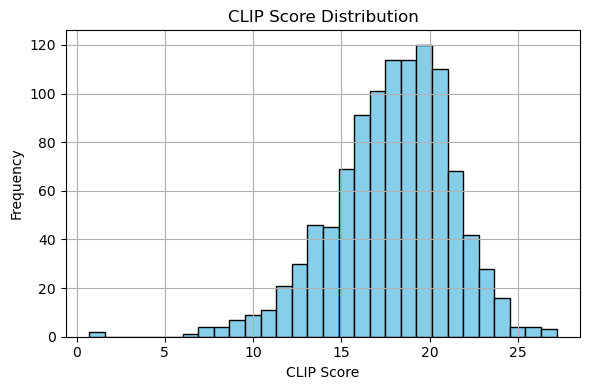

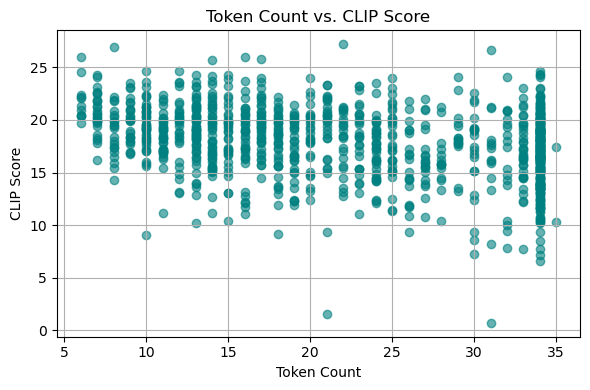

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
df = pd.read_csv('../results.csv')

# CLIP Score 直方图
plt.figure(figsize=(6, 4))
plt.hist(df['CLIP Score'], bins=30, color='skyblue', edgecolor='black')
plt.title('CLIP Score Distribution')
plt.xlabel('CLIP Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig('clip_score_distribution.png', dpi=300)
plt.show()

# 2Token Count vs. CLIP Score 散点图
plt.figure(figsize=(6, 4))
plt.scatter(df['Token Count'], df['CLIP Score'], alpha=0.6, color='teal')
plt.title('Token Count vs. CLIP Score')
plt.xlabel('Token Count')
plt.ylabel('CLIP Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('token_vs_clip.png', dpi=300)
plt.show()


In [6]:
df['CLIP Score'].to_csv("scores.dat", index=False, header=False)

df[['Token Count', 'CLIP Score']].assign(label='a').to_csv(
    "scatter.dat", sep=" ", index=False, header=False
)

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('../results.csv')
df_sorted = df.sort_values('CLIP Score', ascending=False)
topn = df_sorted.head(50)
bottomn = df_sorted.tail(50)

# 计算排名对应平均得分
top_scores = topn['CLIP Score'].values
bottom_scores = bottomn['CLIP Score'].values

# 累积均值曲线
top_cum = np.cumsum(top_scores) / np.arange(1, 51)
bot_cum = np.cumsum(bottom_scores[::-1]) / np.arange(1, 51)

# 保存为 .dat 用于 PGFPlots
with open('../compare.dat', 'w') as f:
    f.write("rank top_mean bottom_mean\n")
    for i, (t, b) in enumerate(zip(top_cum, bot_cum), 1):
        f.write(f"{i} {t:.4f} {b:.4f}\n")


                   Prompt  MeanScore    StdDev  Count
0     A detailed photo of  17.762502  3.649015   1064
1  A picture that depicts  18.355956  3.232886   1064
2    A realistic image of  18.204578  2.989696   1064
3             An image of  18.104050  3.629508   1064
4        This image shows  17.784936  3.593017   1064


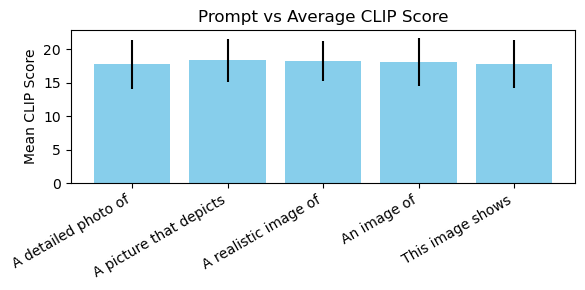

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 载入数据
df = pd.read_csv("../results_multi_prompt.csv")

# 统计聚合
agg = df.groupby("Prompt")["CLIP Score"].agg(['mean', 'std', 'count']).reset_index()
agg.columns = ['Prompt', 'MeanScore', 'StdDev', 'Count']
agg.to_csv("prompt_summary.csv", index=False)

print(agg)

# 可视化演示（可选）
plt.figure(figsize=(6,3))
plt.bar(agg['Prompt'], agg['MeanScore'], yerr=agg['StdDev'], color='skyblue')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Mean CLIP Score")
plt.title("Prompt vs Average CLIP Score")
plt.tight_layout()
plt.savefig("prompt_promptbar.png", dpi=300)
plt.show()

C:\Users\Bruni\AppData\Local\Temp\ipykernel_2128\541269337.py:23: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Bruni\AppData\Local\Temp\ipykernel_2128\541269337.py:23: UserWarning: Glyph 26495 (\N{CJK UNIFIED IDEOGRAPH-677F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Bruni\AppData\Local\Temp\ipykernel_2128\541269337.py:23: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Bruni\AppData\Local\Temp\ipykernel_2128\541269337.py:23: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Bruni\AppData\Local\Temp\ipykernel_2128\541269337.py:23: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Bruni\AppData\Local\Temp\ipykernel_2128\541269337.py:23: UserWarning: Glyph 39640 (\N{CJK UNIFIE

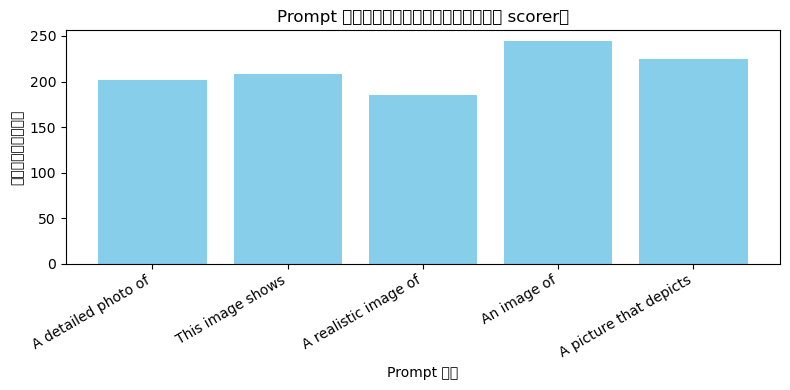

BestPrompt
A detailed photo of       202
This image shows          208
A realistic image of      185
An image of               244
A picture that depicts    225
Name: count, dtype: int64


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV（包含 Image, Prompt, Caption, Token Count, CLIP Score）
df = pd.read_csv("../results_multi_prompt.csv")

# 只保留有用列，每张图里多 prompt 生成需要 pivot
pivot = df.pivot(index="Image", columns="Prompt", values="CLIP Score")

# 找出每张图哪种 Prompt 得分最高
pivot["BestPrompt"] = pivot.idxmax(axis=1)

# 统计每个 Prompt 成为 BestPrompt 的次数
win_counts = pivot["BestPrompt"].value_counts().reindex(df["Prompt"].unique()).fillna(0)

# 可视化柱状图
plt.figure(figsize=(8, 4))
plt.bar(win_counts.index, win_counts.values, color="skyblue")
plt.xlabel("Prompt 模板")
plt.ylabel("作为最高得分的次数")
plt.title("Prompt 在极端样本中的表现对比（成为最佳 scorer）")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.savefig("prompt_best_counts.png", dpi=300)
plt.show()

print(win_counts)

In [13]:
import pandas as pd

data = {
    "Prompt": [
        "A detailed photo of",
        "This image shows",
        "A realistic image of",
        "An image of",
        "A picture that depicts"
    ],
    "Count": [202, 208, 185, 244, 225]
}

df = pd.DataFrame(data)
df["Prompt"] = df["Prompt"].str.replace(" ", "_")

df.to_csv("best_prompt.dat", sep=" ", index=False)

print("best_prompt.dat 文件已成功保存")


best_prompt.dat 文件已成功保存


In [18]:
import pandas as pd

df = pd.read_csv("results_multi_prompt.csv")

df['PromptID'] = df['Prompt'].astype('category').cat.codes

df['ImageID'] = df.groupby('PromptID').cumcount()

df_3d = df[['PromptID', 'ImageID', 'CLIP Score']]

df_3d.to_csv("clipscore_3d.dat", sep=' ', index=False, header=False)

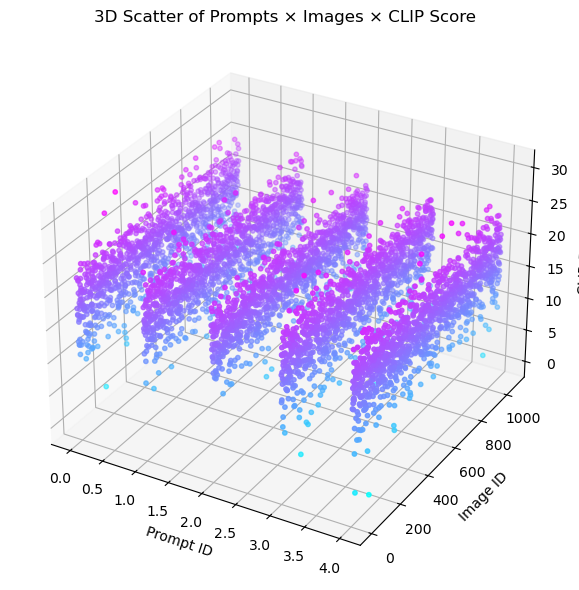

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 读取数据
df = pd.read_csv("results_multi_prompt.csv")

# 创建 Prompt ID 映射
df["PromptID"] = df["Prompt"].astype("category").cat.codes
df["ImageID"] = df["Image"].astype("category").cat.codes

# 创建 3D 图
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 画散点图
ax.scatter(df["PromptID"], df["ImageID"], df["CLIP Score"], c=df["CLIP Score"], cmap='cool', s=10)

# 坐标轴设置
ax.set_xlabel("Prompt ID")
ax.set_ylabel("Image ID")
ax.set_zlabel("CLIP Score")
ax.set_title("3D Scatter of Prompts × Images × CLIP Score")

plt.tight_layout()
plt.show()

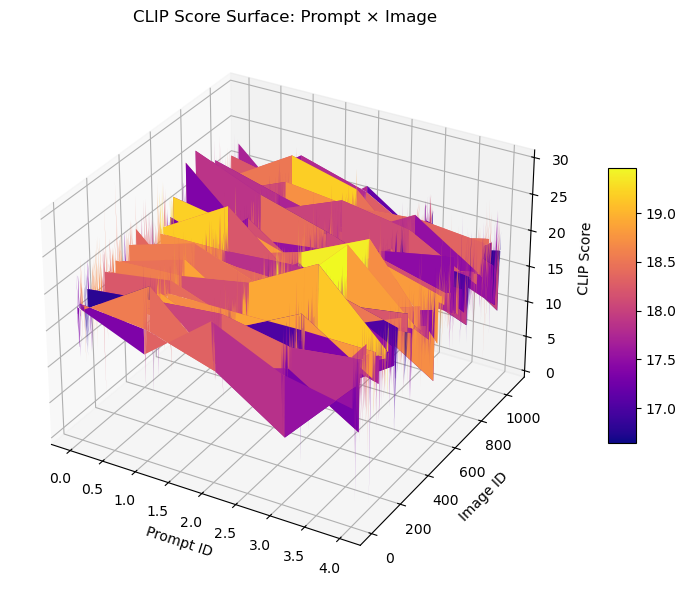

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("results_multi_prompt.csv")
df["PromptID"] = df["Prompt"].astype("category").cat.codes
df["ImageID"] = df["Image"].astype("category").cat.codes

# 建立 pivot table: Image × Prompt
pivot = df.pivot_table(index="ImageID", columns="PromptID", values="CLIP Score")

# 生成 X, Y 网格
X, Y = np.meshgrid(pivot.columns, pivot.index)
Z = pivot.values

# 绘图
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none')

ax.set_xlabel("Prompt ID")
ax.set_ylabel("Image ID")
ax.set_zlabel("CLIP Score")
ax.set_title("CLIP Score Surface: Prompt × Image")

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.tight_layout()
plt.savefig("clipscore_surface.pdf")
plt.show()

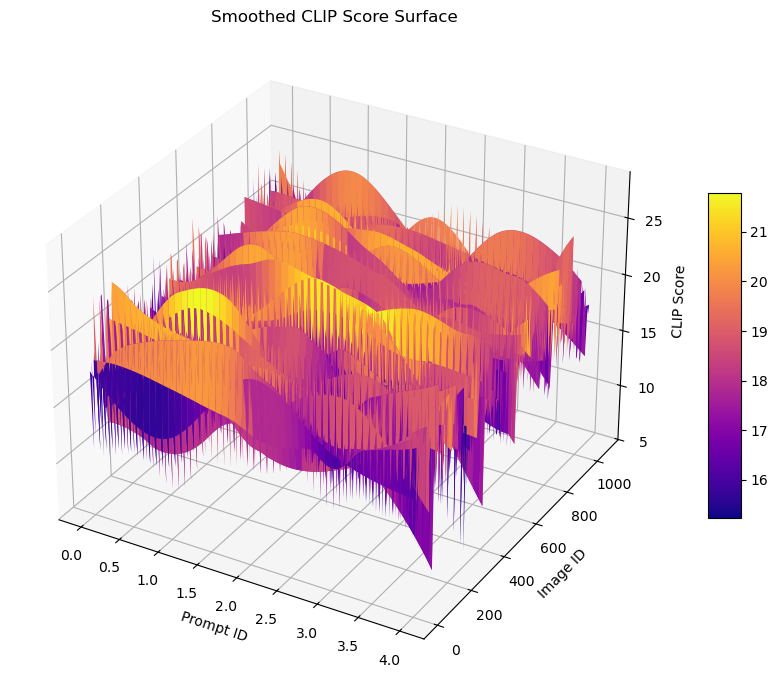

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# 读取数据并编码
df = pd.read_csv("results_multi_prompt.csv")
df["PromptID"] = df["Prompt"].astype("category").cat.codes
df["ImageID"] = df["Image"].astype("category").cat.codes

# 原始点数据
points = df[["PromptID", "ImageID"]].values
values = df["CLIP Score"].values

# 构建更密集的网格
grid_x, grid_y = np.mgrid[
    df["PromptID"].min():df["PromptID"].max():100j,
    df["ImageID"].min():df["ImageID"].max():200j,
]

# 插值
grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')

# 可视化
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_x, grid_y, grid_z,
                       cmap="plasma", edgecolor='none', linewidth=0, antialiased=True)

ax.set_xlabel("Prompt ID")
ax.set_ylabel("Image ID")
ax.set_zlabel("CLIP Score")
ax.set_title("Smoothed CLIP Score Surface")

fig.colorbar(surf, shrink=0.5, aspect=10)
plt.tight_layout()
plt.savefig("clipscore_surface_smooth.pdf")
plt.show()

In [20]:
import pandas as pd

df = pd.read_csv("mutual_matrix.csv", index_col=0)

centered_df = df - 18

centered_df.to_csv("mutual_matrix_centered.csv")

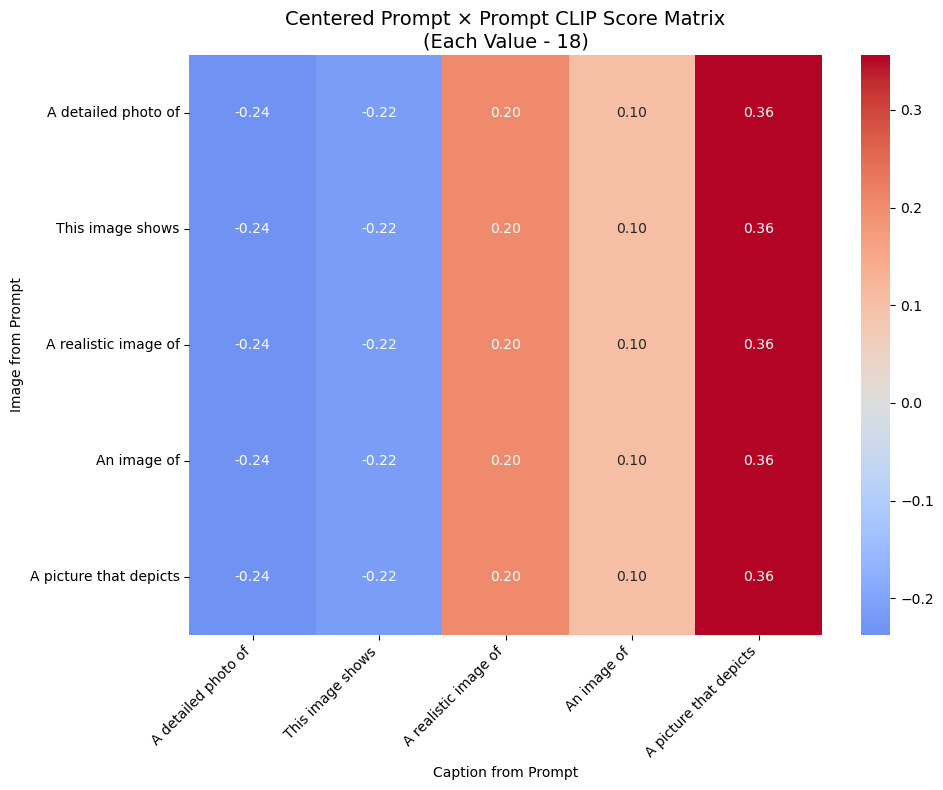

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取 mutual_matrix.csv
df = pd.read_csv("mutual_matrix.csv", index_col=0)

# 所有值减去18进行中心化
centered_df = df - 18

# 画热力图
plt.figure(figsize=(10, 8))
ax = sns.heatmap(centered_df, annot=True, cmap="coolwarm", center=0, fmt=".2f")
ax.set_title("Centered Prompt × Prompt CLIP Score Matrix\n(Each Value - 18)", fontsize=14)
ax.set_xlabel("Caption from Prompt")
ax.set_ylabel("Image from Prompt")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("mutual_matrix_centered.png", dpi=300)
plt.show()

C:\Users\Bruni\AppData\Local\Temp\ipykernel_2128\603033308.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.values, y=grouped.index, palette="Blues_d")


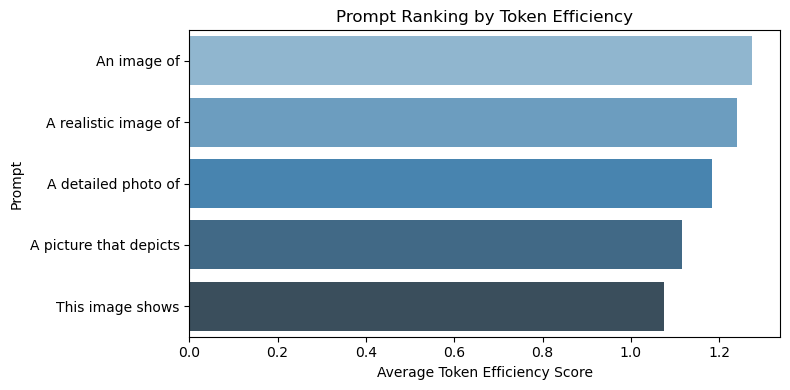

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv("results_multi_prompt.csv")

# 添加自定义评分列
df["EfficiencyScore"] = df["CLIP Score"] / df["Token Count"]

# 计算每个 Prompt 的平均值
grouped = df.groupby("Prompt")["EfficiencyScore"].mean().sort_values(ascending=False)

# 保存 CSV
grouped.to_csv("efficiency_score_summary.csv", header=True)

# 画图
plt.figure(figsize=(8, 4))
sns.barplot(x=grouped.values, y=grouped.index, palette="Blues_d")
plt.xlabel("Average Token Efficiency Score")
plt.title("Prompt Ranking by Token Efficiency")
plt.tight_layout()
plt.savefig("efficiency_score_bar.png", dpi=300)
plt.show()

In [24]:
import pandas as pd

# Load your results CSV
df = pd.read_csv("results_multi_prompt.csv")

# Compute efficiency: CLIP score per token
df["Efficiency"] = df["CLIP Score"] / df["Token Count"]

# Extract prompt from caption (assumes prompt is the start)
prompts = [
    "A detailed photo of",
    "This image shows",
    "A realistic image of",
    "An image of",
    "A picture that depicts"
]

def identify_prompt(caption):
    for p in prompts:
        if caption.startswith(p):
            return p.replace(" ", "_")
    return "Unknown"

df["Prompt"] = df["Caption"].apply(identify_prompt)

# Group and calculate average efficiency per prompt
efficiency_df = (
    df.groupby("Prompt")["Efficiency"]
    .mean()
    .reset_index()
    .sort_values("Efficiency", ascending=False)
)

# Save as TikZ-friendly .dat file
efficiency_df.to_csv("efficiency_score.dat", sep=' ', index=False)

print("Saved to efficiency_score.dat")

Saved to efficiency_score.dat


C:\Users\Bruni\AppData\Local\Temp\ipykernel_2128\4151053202.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Score", y="Prompt", data=df, palette="Blues_d")


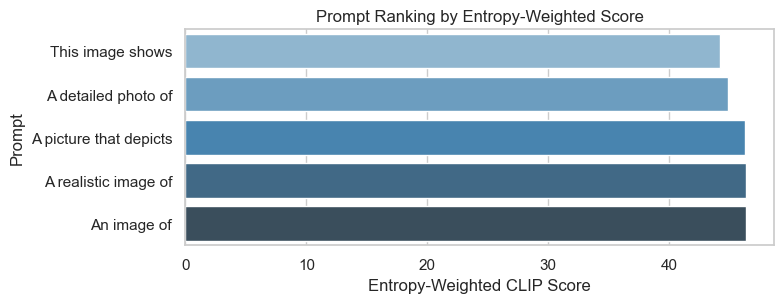

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 数据
data = {
    "Prompt": [
        "An image of", "A realistic image of", "A picture that depicts",
        "A detailed photo of", "This image shows"
    ],
    "Score": [
        46.335884660799465, 46.3131478216028, 46.24355828026567,
        44.85071058593306, 44.22728738136389
    ]
}
df = pd.DataFrame(data)
df = df.sort_values("Score", ascending=True)

# 设置风格
sns.set(style="whitegrid")
plt.figure(figsize=(8, 3.2))
barplot = sns.barplot(x="Score", y="Prompt", data=df, palette="Blues_d")
plt.xlabel("Entropy-Weighted CLIP Score")
plt.ylabel("Prompt")
plt.title("Prompt Ranking by Entropy-Weighted Score", fontsize=12)
plt.tight_layout()

# 保存为高分辨率 PNG
plt.savefig("entropy_weighted_bar.png", dpi=300)
plt.show()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 原始数据
data = {
    "Prompt": [
        "An image of", "A realistic image of", "A picture that depicts",
        "A detailed photo of", "This image shows"
    ],
    "Score": [
        46.335884660799465, 46.3131478216028, 46.24355828026567,
        44.85071058593306, 44.22728738136389
    ]
}
df = pd.DataFrame(data)

# Min-Max Normalization
df["NormScore"] = (df["Score"] - df["Score"].min()) / (df["Score"].max() - df["Score"].min())

# 按归一化后的得分排序
df = df.sort_values("NormScore", ascending=True)

C:\Users\Bruni\AppData\Local\Temp\ipykernel_2128\4121311343.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="NormScore", y="Prompt", data=df, palette="crest")


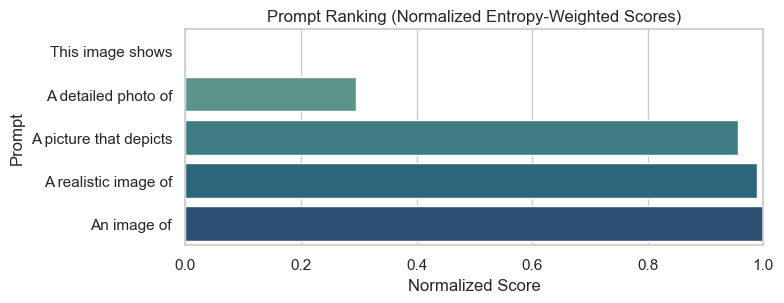

In [28]:
# 可视化设置
sns.set(style="whitegrid")
plt.figure(figsize=(8, 3.2))
sns.barplot(x="NormScore", y="Prompt", data=df, palette="crest")

# 标注美化
plt.xlabel("Normalized Score")
plt.ylabel("Prompt")
plt.title("Prompt Ranking (Normalized Entropy-Weighted Scores)", fontsize=12)
plt.xlim(0, 1)
plt.tight_layout()

# 保存为 PNG 以插入 LaTeX
plt.savefig("normalized_entropy_weighted_bar.png", dpi=300)
plt.show()

In [31]:
import os

def print_tree(start_path='.', prefix=''):
    items = sorted(os.listdir(start_path))
    for idx, item in enumerate(items):
        path = os.path.join(start_path, item)
        connector = '└── ' if idx == len(items) - 1 else '├── '
        print(prefix + connector + item)
        if os.path.isdir(path):
            extension = '    ' if idx == len(items) - 1 else '│   '
            print_tree(path, prefix + extension)

print_tree('./Emu3-Mutimodal-NextToken')  # 你可以替换成你的项目路径


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './Emu3-Mutimodal-NextToken'